In [3]:
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils import plot_model
import h5py
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [6]:
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
x_train = X_train_orig/255.
x_test = X_test_orig/255.

# Reshape
y_train = Y_train_orig.T
y_test = Y_test_orig.T

print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [8]:
def HappyModel(input_shape):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)   
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Dropout(0.025)(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    

    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [10]:
happy_model = HappyModel(x_train.shape[1:])
happy_model.compile("adam","binary_crossentropy", metrics=['accuracy'])
happy_model.fit(x_train, y_train, epochs=40, batch_size=32,
                validation_data=(x_test, y_test), shuffle=True)

Epoch 1/40
19/19 [==============================] - 0s 15ms/step - loss: 0.8510 - accuracy: 0.5033 - val_loss: 0.6695 - val_accuracy: 0.5600
Epoch 2/40
19/19 [==============================] - 0s 12ms/step - loss: 0.6687 - accuracy: 0.5517 - val_loss: 0.6815 - val_accuracy: 0.4733
Epoch 3/40
19/19 [==============================] - 0s 12ms/step - loss: 0.6112 - accuracy: 0.7300 - val_loss: 0.5736 - val_accuracy: 0.7667
Epoch 4/40
19/19 [==============================] - 0s 12ms/step - loss: 0.5897 - accuracy: 0.6383 - val_loss: 0.6605 - val_accuracy: 0.5467
Epoch 5/40
19/19 [==============================] - 0s 12ms/step - loss: 0.4996 - accuracy: 0.7750 - val_loss: 0.4964 - val_accuracy: 0.7200
Epoch 6/40
19/19 [==============================] - 0s 12ms/step - loss: 0.4051 - accuracy: 0.8550 - val_loss: 0.4459 - val_accuracy: 0.7667
Epoch 7/40
19/19 [==============================] - 0s 12ms/step - loss: 0.3175 - accuracy: 0.8917 - val_loss: 0.4242 - val_accuracy: 0.7667
Epoch 8/40
19

1/1 [==============================] - 0s 30ms/step
[[0.]]


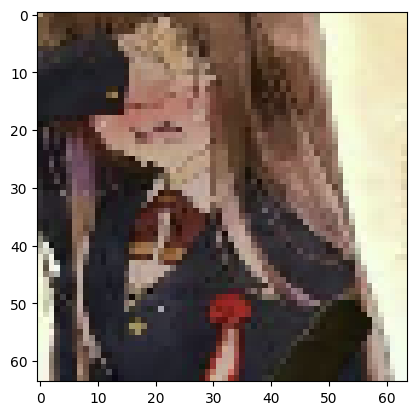

In [11]:
img_path = 'cry.png'

img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happy_model.predict(x))
